## Simulate binned magnitudes

In [1]:
import numpy as np
from functions.general_functions import simulated_magnitudes_binned
from seismostats import plot_cum_fmd

<Axes: xlabel='Magnitude', ylabel='N'>

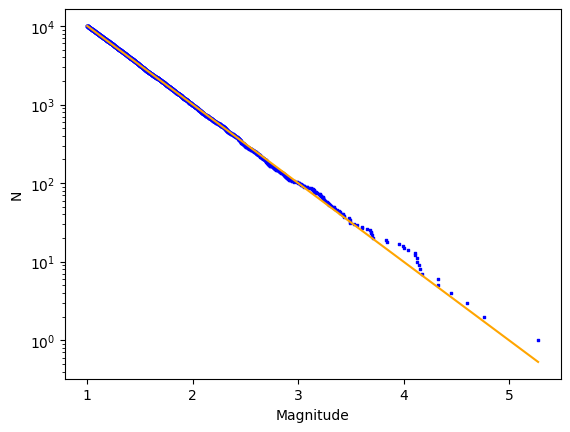

In [2]:
n= 10000
b = 1
mc = 1
delta_m = 0.001
b_parameter = 'b_value'
mags = simulated_magnitudes_binned(n, b, mc, delta_m, b_parameter=b_parameter)

# show in plot
plot_cum_fmd(mags, b_value=b, color=['blue','orange'])

## Utsu test

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import utsu_test, simulated_magnitudes_binned
from seismostats import estimate_b


In [4]:
b1 = 1
b2 = 1.2
n1=50
n2=50

mc = 0
delta_m=0.1
b_parameter='b_value'

mags1 = simulated_magnitudes_binned(n1, b1, mc, delta_m, b_parameter=b_parameter)
mags2 = simulated_magnitudes_binned(n2, b2, mc, delta_m, b_parameter=b_parameter)
b_est1 = estimate_b(mags1, mc, delta_m, b_parameter='beta')
b_est2 = estimate_b(mags2, mc, delta_m, b_parameter='beta')

p = utsu_test(b1, b2, n1, n2)

print('Utsu test: p = ', p)

Utsu test: p =  0.24294015523269816


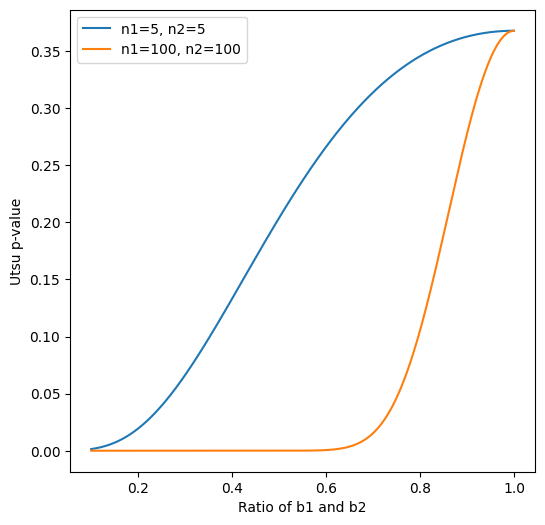

In [5]:
n1= 5 
n2= 5 
ratios = np.arange(0.1, 1, 0.001)
p = np.zeros(len(ratios))
for ii, ratio in enumerate(ratios):
    b1 = 1
    b2 = b1 / ratio
    p[ii] = utsu_test(b1, b2, n1, n2)


n1= 100 
n2= 100 
p2 = np.zeros(len(ratios))
for ii, ratio in enumerate(ratios):
    b1 = 1
    b2 = b1 / ratio
    p2[ii] = utsu_test(b1, b2, n1, n2)

# plot 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(ratios, p, label='n1=5, n2=5')
ax.plot(ratios, p2, label='n1=100, n2=100')
ax.set_xlabel('Ratio of b1 and b2')
ax.set_ylabel('Utsu p-value')
ax.legend()

## Simulate step and plot b-values with running window

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import simulate_step, b_any_series

In [7]:
n = 10000
n_anomal = 500
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_step(n, n_anomal, b, delta_b, mc, delta_m)

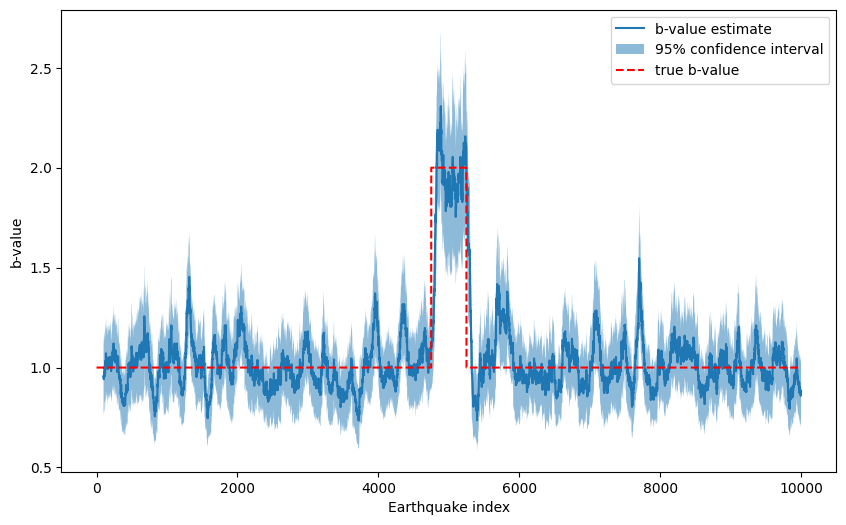

In [8]:
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

## Different cutting methods

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import cut_random_idx, cut_constant_idx, cut_random

In [10]:
times = [10,20,30,40,50,51,52,53,54,55,56,57, 58,59,60,61,62,63,64,65,66,67, 68,69,70,80,90,100, 110, 120, 130, 140, 150, 160, 170,171, 172,173,174,175,176,177,178,179, 180, 190, 200, 300,400,500]

a = np.random.rand(len(times))

n_b = 8
offset = 0

idx_const, c_chunks = cut_constant_idx(a, len(a)/n_b, offset=0)
idx_rand, r_chunks = cut_random_idx(a, int(len(a)/n_b))
idx_time, t_chunks = cut_random(a, int(len(a)/n_b), times)

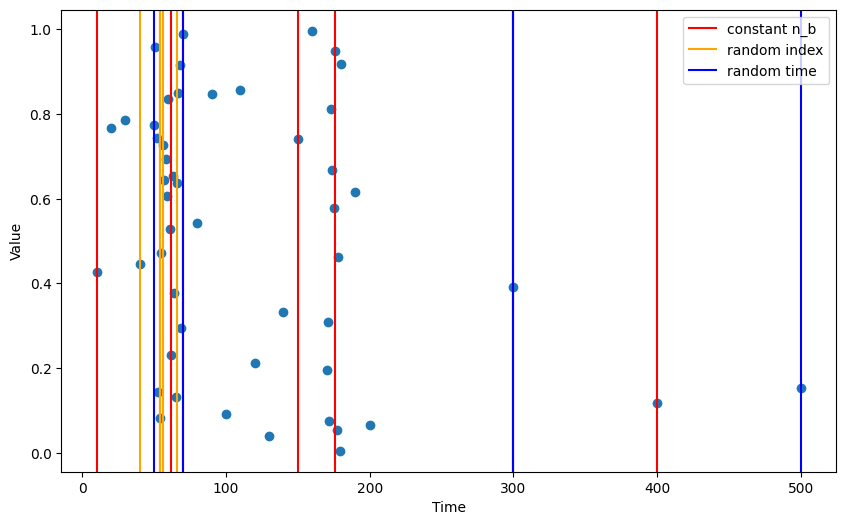

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(times, a, 'o')

# plot vertical lines at the cut points
cnt = 0
for ii in idx_const:
    if cnt == 0:
        ax.axvline(times[ii], color='red', label='constant n_b')
        cnt += 1
    else:
        ax.axvline(times[ii], color='red')

for ii in idx_rand:
    if cnt == 1:
        ax.axvline(times[ii], color='orange', label='random index')
        cnt += 1
    else:
        ax.axvline(times[ii], color='orange')

for ii in idx_time:
    if cnt == 2:
        ax.axvline(times[ii], color='blue', label='random time')
        cnt += 1
    else:
        ax.axvline(times[ii], color='blue')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc='upper right')

The lines show where the cuts are chosen. They cut will be performed riht before the value that the line is on, so that that value will be the first element of the subsample

## random_samples and random_samples_pos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import b_samples, b_samples_pos
from functions.general_functions import simulate_step

Text(0, 0.5, 'Number of earthquakes')

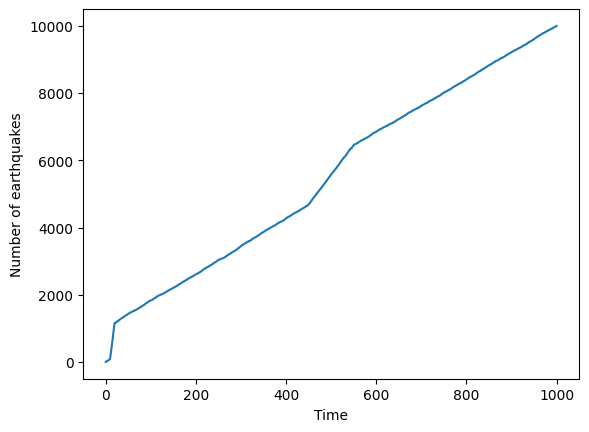

In [2]:
n = 10000
n_anomal = 1000
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_step(n, n_anomal, b, delta_b, mc, delta_m)
times = np.random.rand(len(mags)-2000)*1000
times_temp = 500 + (np.random.rand(1000)-0.5)*100
times_temp2 = 10+ np.random.rand(1000)*10
times = np.concatenate((times, times_temp, times_temp2))
times = np.sort(times)

plt.plot(times, np.arange(len(times)))
#label
plt.xlabel('Time')
plt.ylabel('Number of earthquakes')

In [3]:
b_series, n_bs, idx = b_samples(mags,100, mc=mc, delta_m=delta_m, cutting='random_idx', return_idx=True, nb_min=2)

Text(0, 0.5, 'b-value')

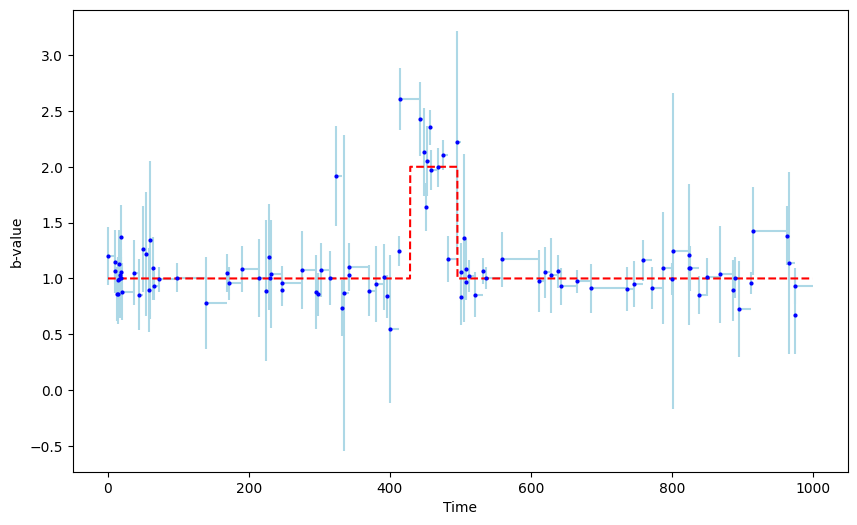

In [4]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Time')
ax.set_ylabel('b-value')

In [5]:
b_series, n_bs, idx = b_samples(mags, 100, mc=mc, delta_m=delta_m, cutting='constant_idx', return_idx=True)

Text(0, 0.5, 'b-value')

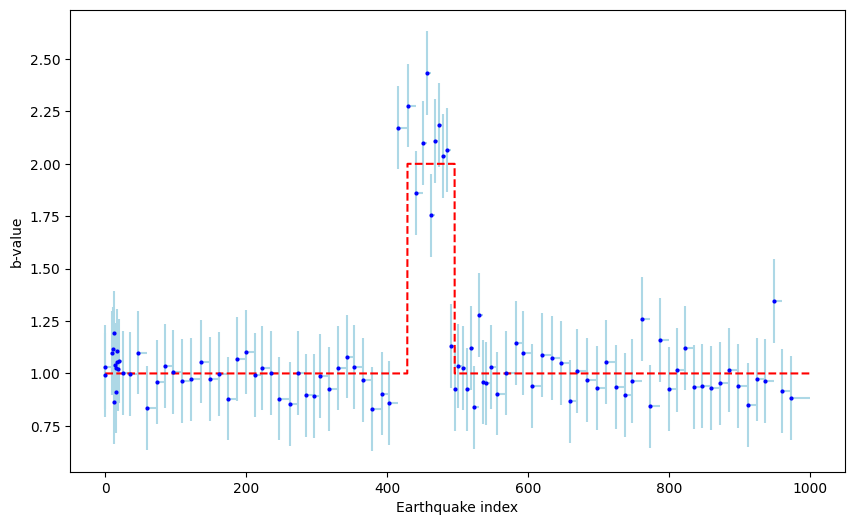

In [6]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')

ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')

In [7]:
b_series, n_bs, idx = b_samples(mags, 100, mc=mc, delta_m=delta_m, cutting='random', return_idx=True, order=times)

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_22683/2665889523.py:10: RuntimeWarning: divide by zero encountered in divide
  yerr=2* b/np.sqrt(n_bs),


Text(0, 0.5, 'b-value')

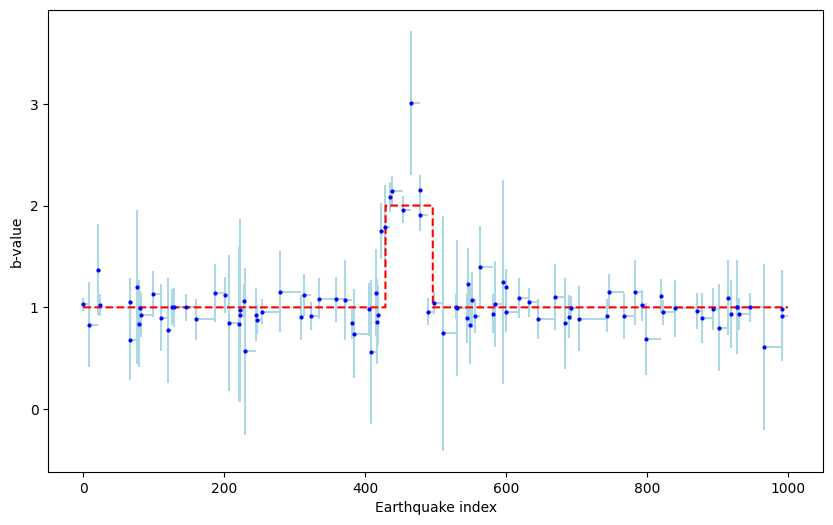

In [8]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')

In [9]:
b_series, n_bs, idx = b_samples_pos(mags, times, 100, delta_m=delta_m, cutting='constant_idx', return_idx=True)

Text(0, 0.5, 'b-value')

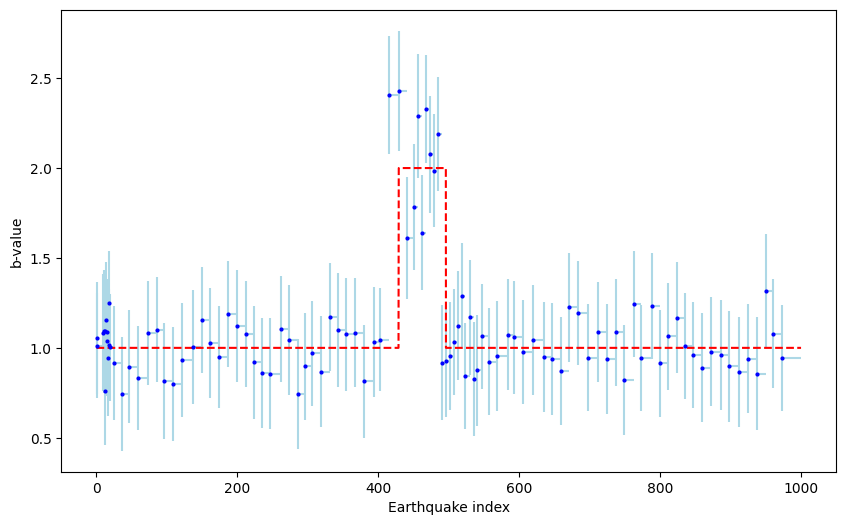

In [10]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')

## Autocorrelation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import autocorrelation
from functions.general_functions import simulate_step
import random

Text(0, 0.5, 'Number of earthquakes')

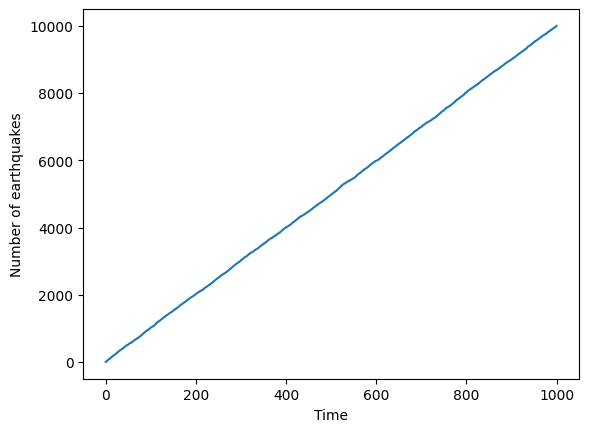

In [2]:
n = 10000
n_anomal = 1000
b = 1
delta_b = 0.3
mc = 0
delta_m = 0.1

mags, b_true = simulate_step(n, n_anomal, b, delta_b, mc, delta_m)
times = np.random.rand(len(mags))*1000
times = np.sort(times)

mags1 = mags[:] + 0
random.shuffle(mags1)

plt.plot(times, np.arange(len(times)))
#label
plt.xlabel('Time')
plt.ylabel('Number of earthquakes')

/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  p = 1 + delta_m / np.average(magnitudes - mc, weights=weights)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:591: RuntimeWarning: invalid value encountered in scalar multiply
  std = 1 / factor * b**2 * std
/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:420: UserWarning: inf encountered in b-series, check what is going on
  warnings.warn(


Text(0, 0.5, 'Probability density')

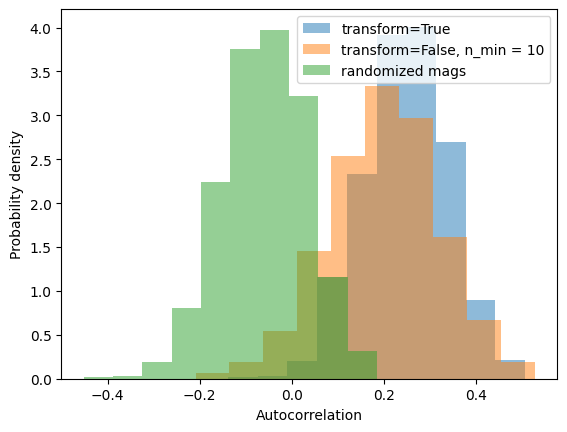

In [7]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:415: UserWarning: nan encountered in b-series, check what is going on
  warnings.warn(


Text(0, 0.5, 'Probability density')

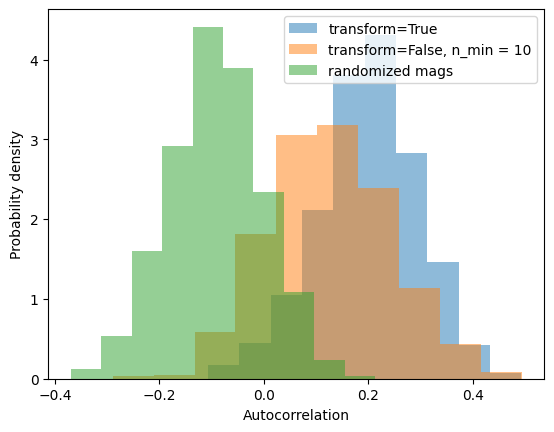

In [10]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

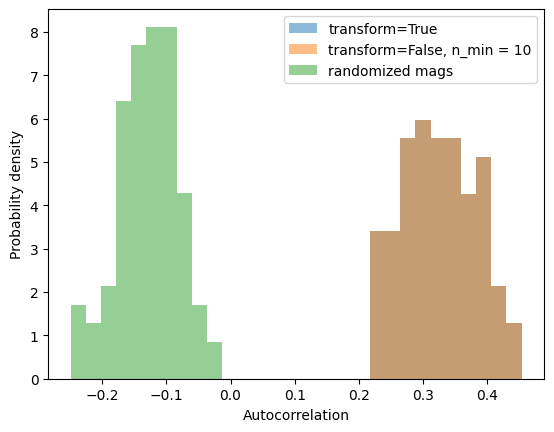

In [11]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

# Mean autocorrelation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import mean_autocorrelation
from functions.general_functions import simulated_magnitudes_binned, simulate_step

In [2]:
n = 5000
b = 1
mc = 0
delta_m = 0.1

times = np.random.rand(n)*1000
times = np.sort(times)

In [8]:
n_acf = 100

mean_acf1 = np.zeros(n_acf)
n_series_used1 = np.zeros(n_acf)
mean_acf = np.zeros(n)
n_series_used = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulated_magnitudes_binned(n, b, mc, delta_m, b_parameter='b_value')
    mean_acf1[ii], n_series_used1[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='positive')
    mean_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

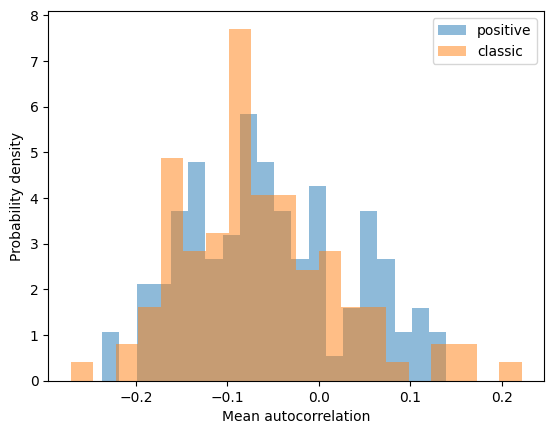

In [9]:
ax  = plt.hist(mean_acf1, alpha=0.5, label='positive', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='classic', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [12]:
n_acf = 500

mean_acf = np.zeros(n)
n_series_used = np.zeros(n_acf)
mean_acf_500 = np.zeros(n_acf)
n_series_used_500 = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulated_magnitudes_binned(n, b, mc, delta_m, b_parameter='b_value')
    mean_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')
    mean_acf_500[ii], n_series_used_500[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=500, transform=True, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

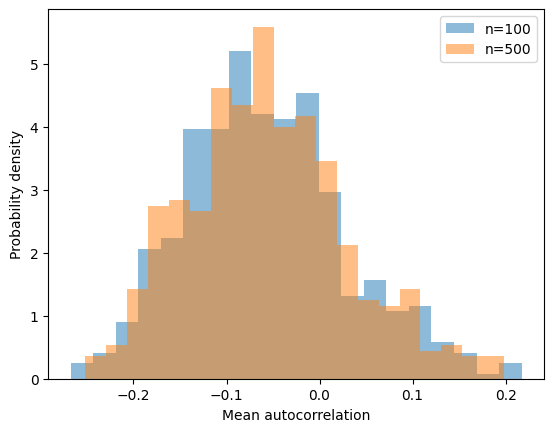

In [14]:
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='n=100', density=True, bins=20)
ax  = plt.hist(mean_acf_500, alpha=0.5, label='n=500', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [34]:
n_acf = 500

n_anomal = 1000
delta_b = 0.3

mean_acf1_step = np.zeros(n_acf)
n_series_used1_step = np.zeros(n_acf)
mean_acf_step = np.zeros(n)
n_series_used_step = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulate_step(n, n_anomal, b, delta_b, mc, delta_m)[0]
    mean_acf1_step[ii], n_series_used1_step[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='positive')
    mean_acf_step[ii], n_series_used_step[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

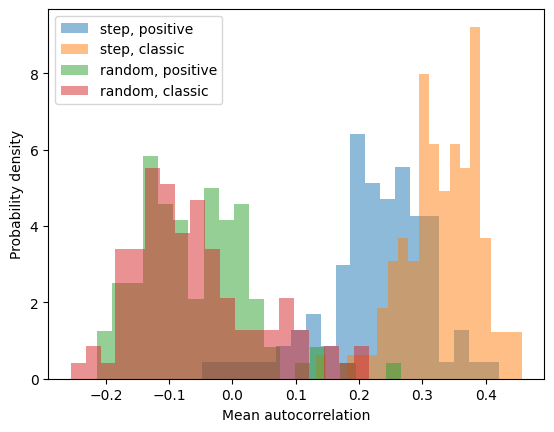

In [33]:
ax  = plt.hist(mean_acf1_step, alpha=0.5, label='step, positive', density=True, bins=20)
ax  = plt.hist(mean_acf_step[:n_acf], alpha=0.5, label='step, classic', density=True, bins=20)
ax  = plt.hist(mean_acf1, alpha=0.5, label='random, positive', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='random, classic', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')